In [9]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [10]:
df= pd.read_csv("data.csv", encoding = 'unicode_escape')
df.shape

(11251, 15)

In [14]:
df.shape

(11251, 15)

In [17]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [21]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [26]:
df.dropna(inplace = True)

In [29]:
df["Amount"] = df["Amount"].astype(int)

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Data Analysis

## Gender

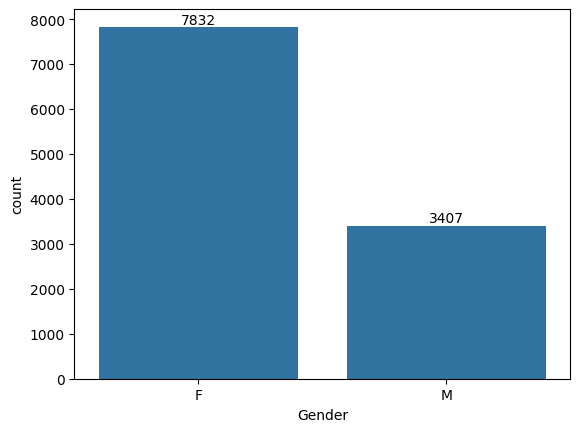

In [41]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [46]:
df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending =False)


,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

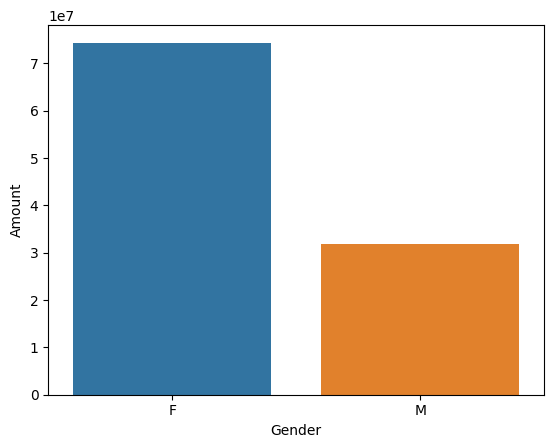

In [12]:
sales_gen = df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending =False)
sns.barplot(x = "Gender", y = "Amount", data = sales_gen, hue = "Gender")

##### from the above two graphs we can say that purchases as well as amount is greates done by females

## AGE GROUP

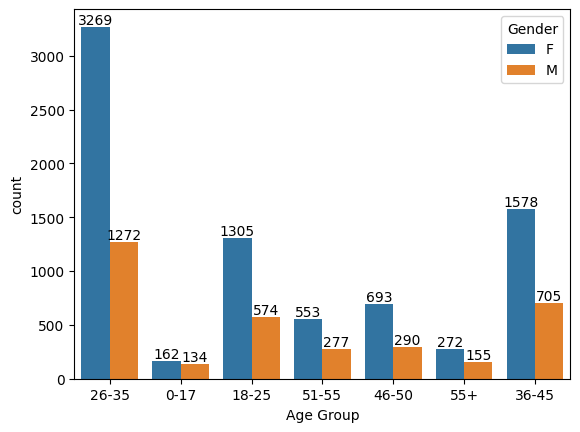

In [51]:
ax = sns.countplot(x = "Age Group", data = df, hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

In [58]:
# Total amount vs age group

sales_age = df.groupby(["Age Group"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

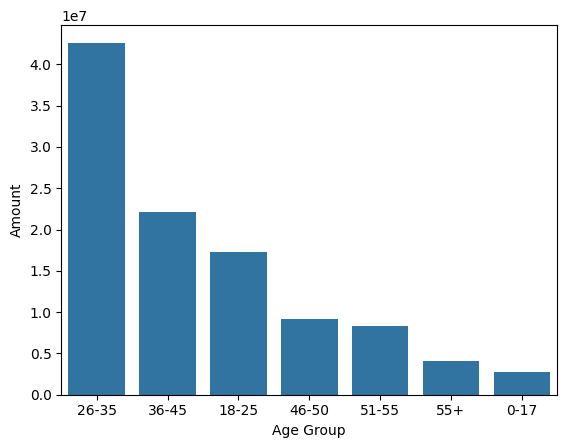

In [59]:
sns.barplot(x = "Age Group", y = "Amount", data = sales_age)

#### From the above graphs we can say most buyers are women in age group of 26 - 35

## STATE

<Axes: xlabel='State', ylabel='Orders'>

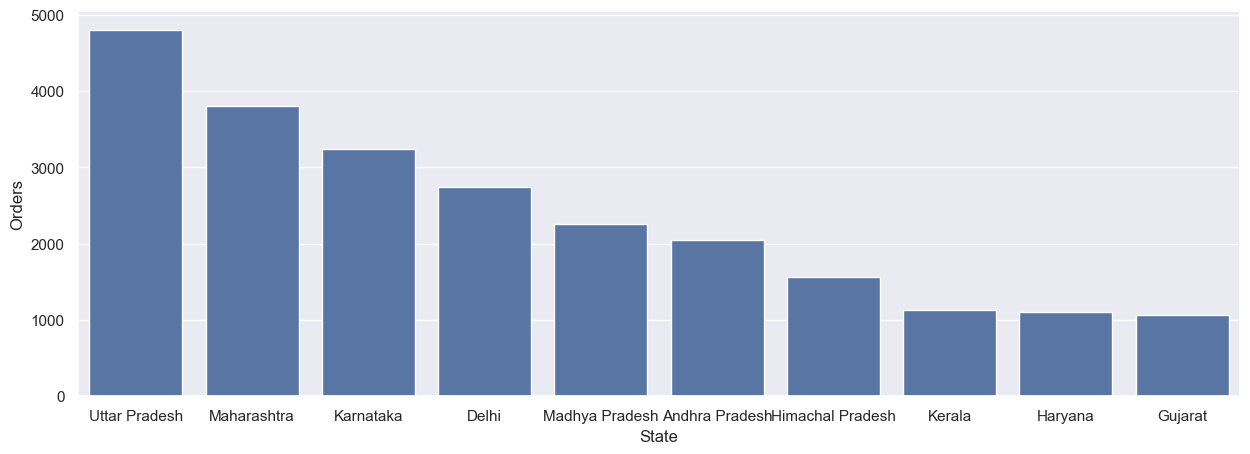

In [67]:
sales_state = df.groupby(["State"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)


sns.set(rc ={'figure.figsize':(15,5)})
sns.barplot(x = "State", y = "Orders", data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

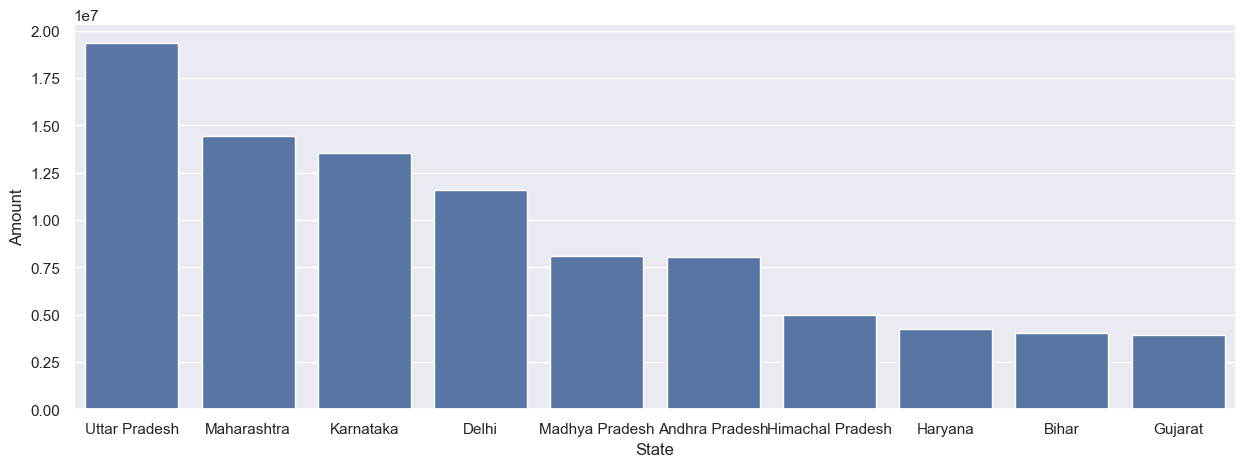

In [68]:
sales_state = df.groupby(["State"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)
sns.set(rc ={'figure.figsize':(15,5)})
sns.barplot(x = "State", y = "Amount", data = sales_state)

##### we can see from both the graphs that top three states both in case of order and amounts are uttar pradesh, maharstra and karnataka 

## MARITAL STATUS

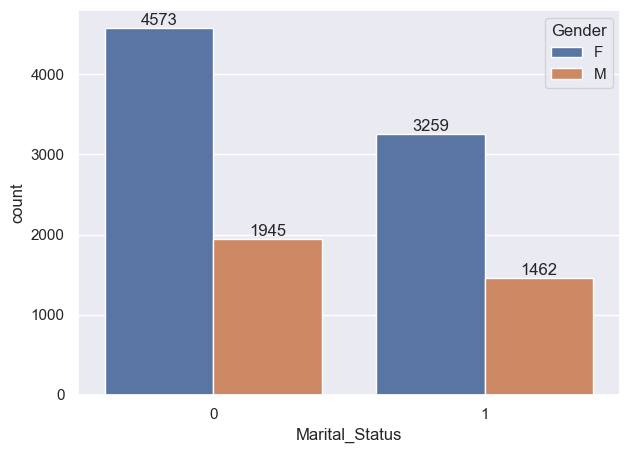

In [84]:
sns.set(rc ={'figure.figsize':(7,5)})

ax = sns.countplot(x = "Marital_Status", data = df,hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

In [90]:
marital_amount = df.groupby(["Marital_Status", "Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

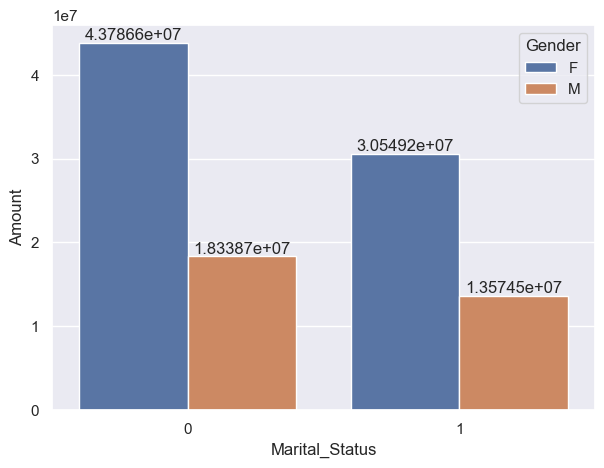

In [91]:
bx = sns.barplot(data = marital_amount, x = 'Marital_Status', y = 'Amount', hue = 'Gender')
for bars in bx.containers:
    bx.bar_label(bars)

#### We can see from the graphs the married women have purchased more in number as well as amount

## OCCUPATION

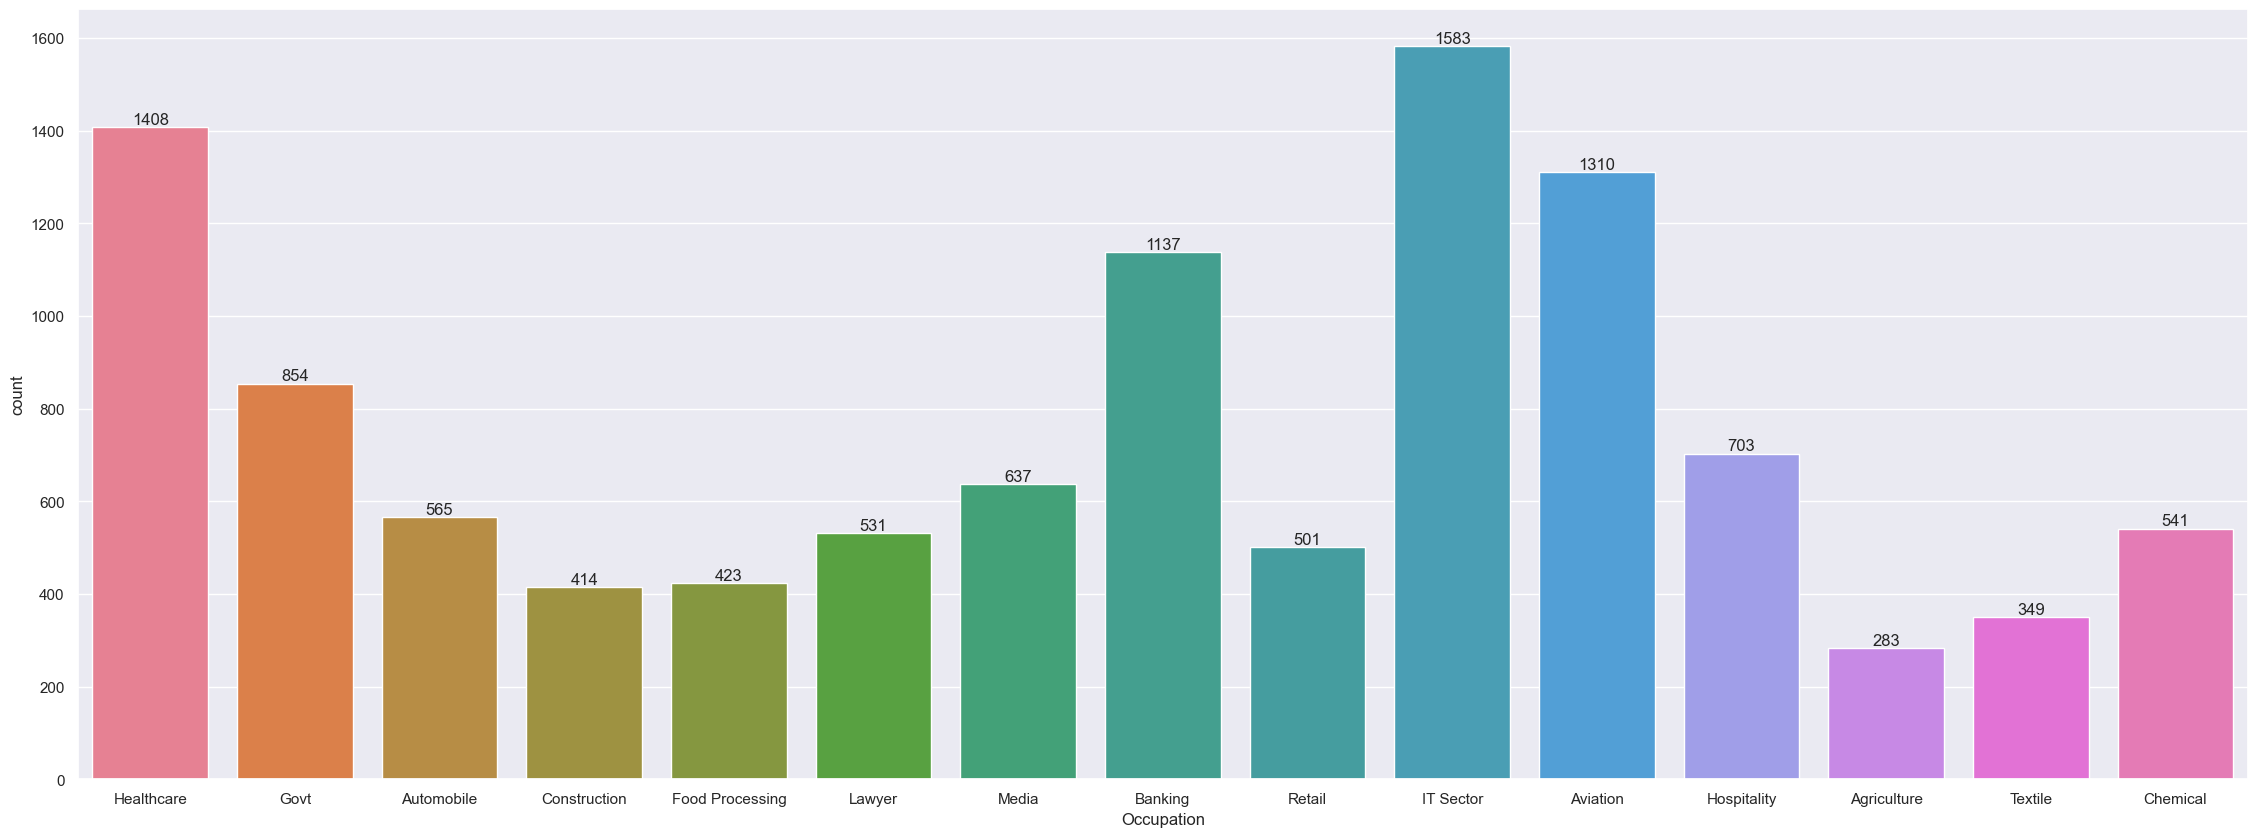

In [103]:
sns.set(rc = {"figure.figsize":(28,10)})

ax = sns.countplot(x = "Occupation", data = df, hue = "Occupation")
for bars in ax.containers:
    ax.bar_label(bars)

In [99]:
sales_state = df.groupby(["Occupation", "Gender"], as_index  = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

<Axes: xlabel='Occupation', ylabel='Amount'>

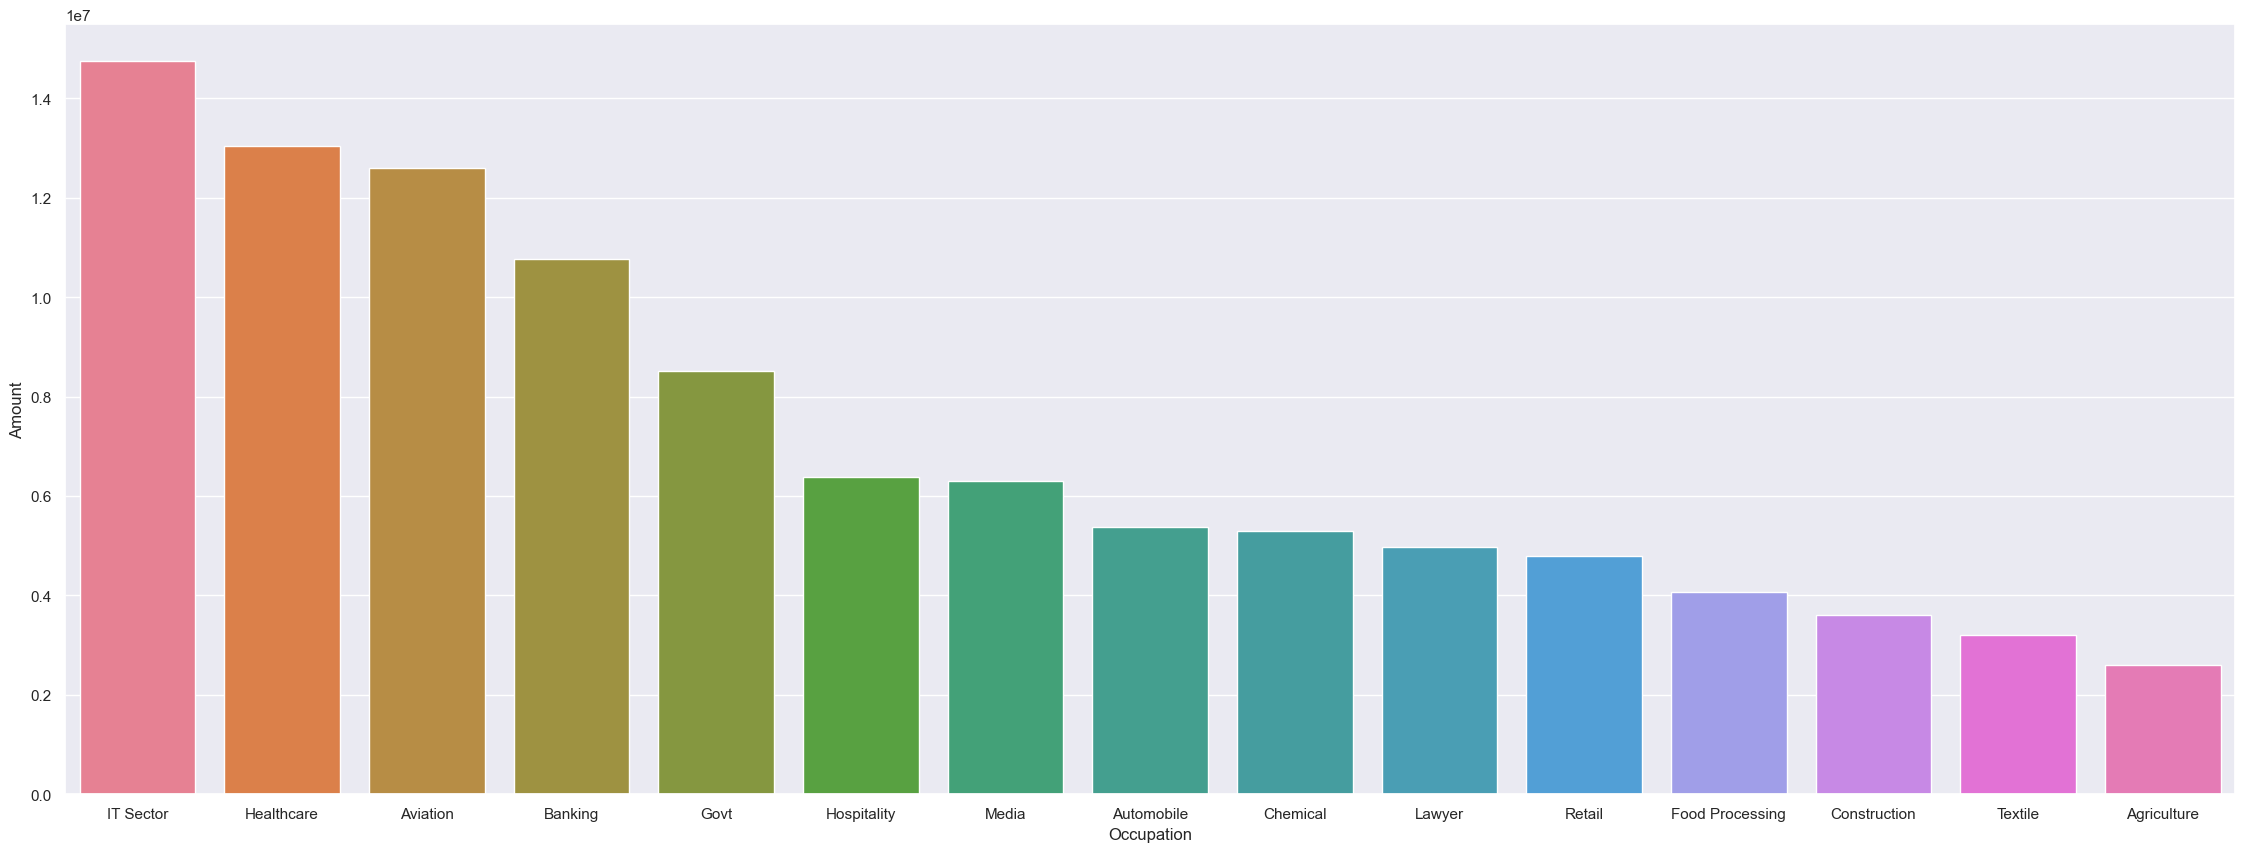

In [104]:
sns.barplot(x = "Occupation", y = "Amount", data = sales_state, hue ="Occupation")

#### from this graph above we can say most amount of shopping is done by IT Sector, Healthcare, Aviation and Banking occupational people.

## Product Category

<Axes: xlabel='Product_Category', ylabel='count'>

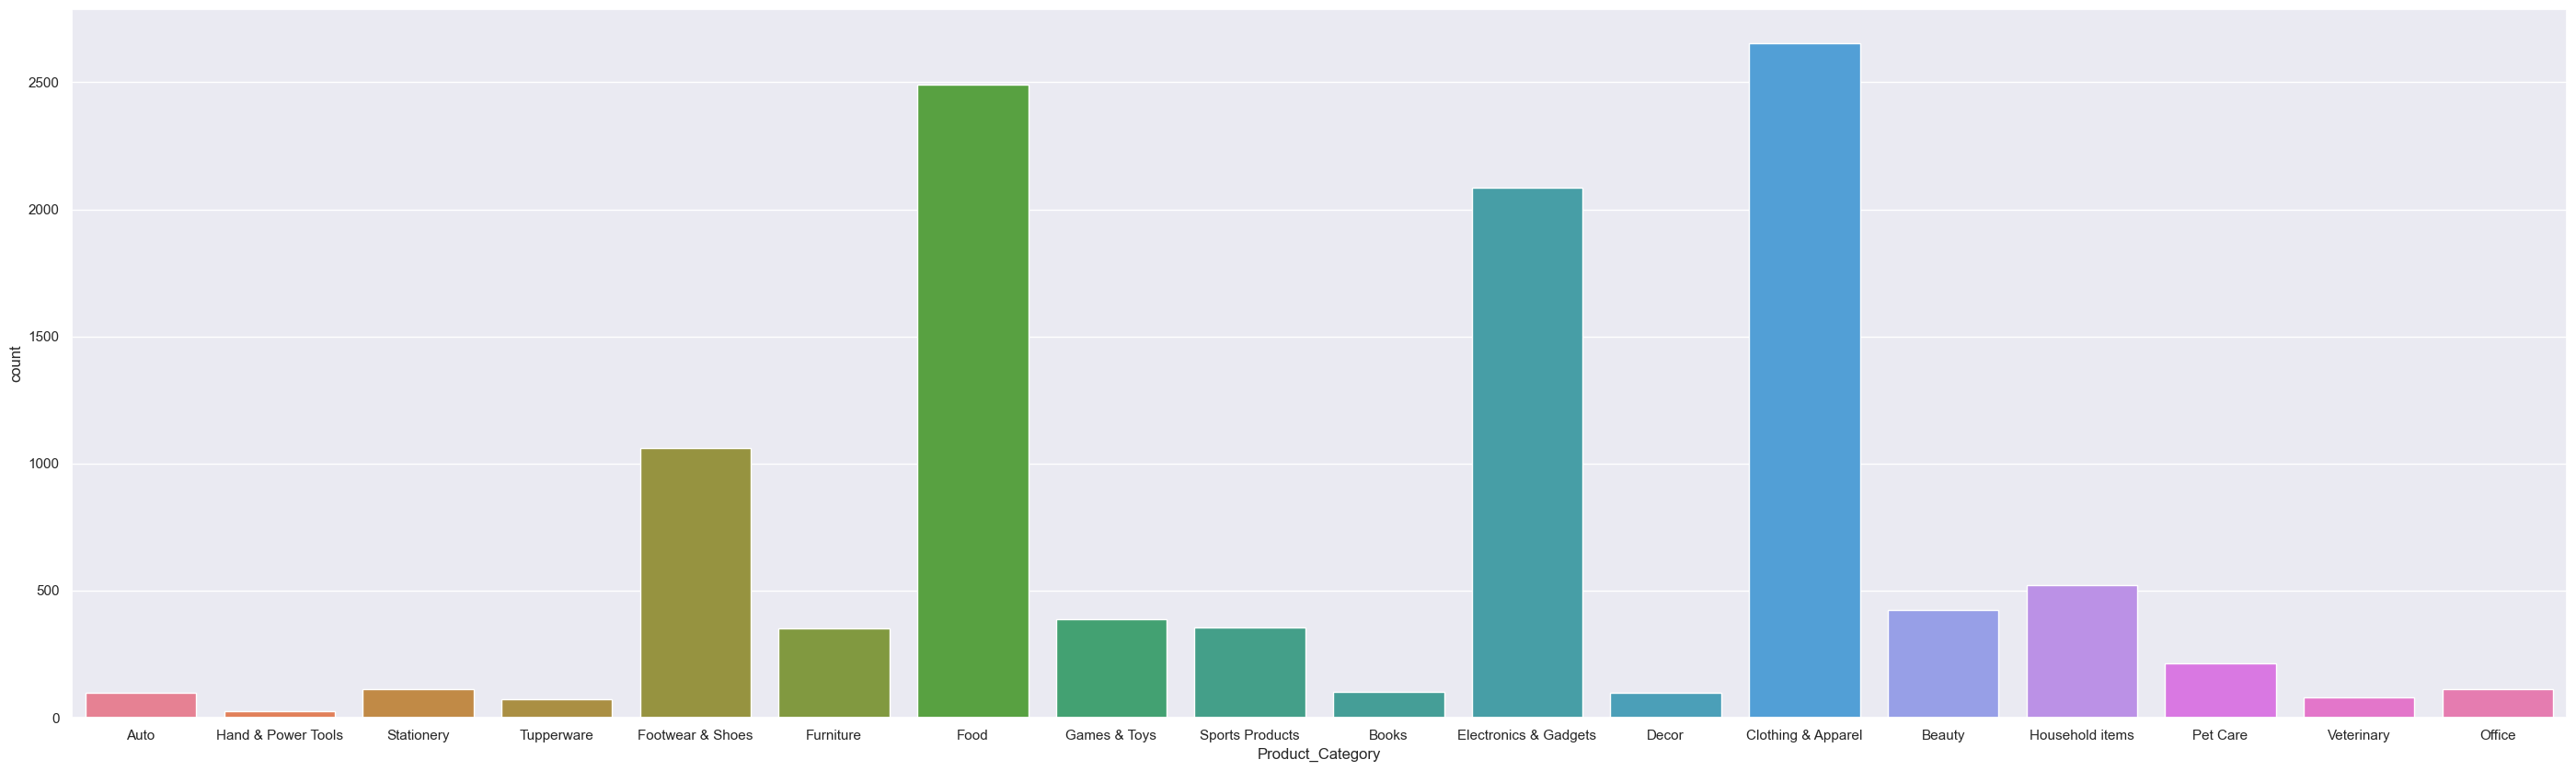

In [114]:
sns.set(rc = {"figure.figsize":(35,10)})
sns.countplot(x = "Product_Category", data = df, hue = "Product_Category")

In [116]:
sales_amount = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)


<Axes: xlabel='Product_Category', ylabel='Amount'>

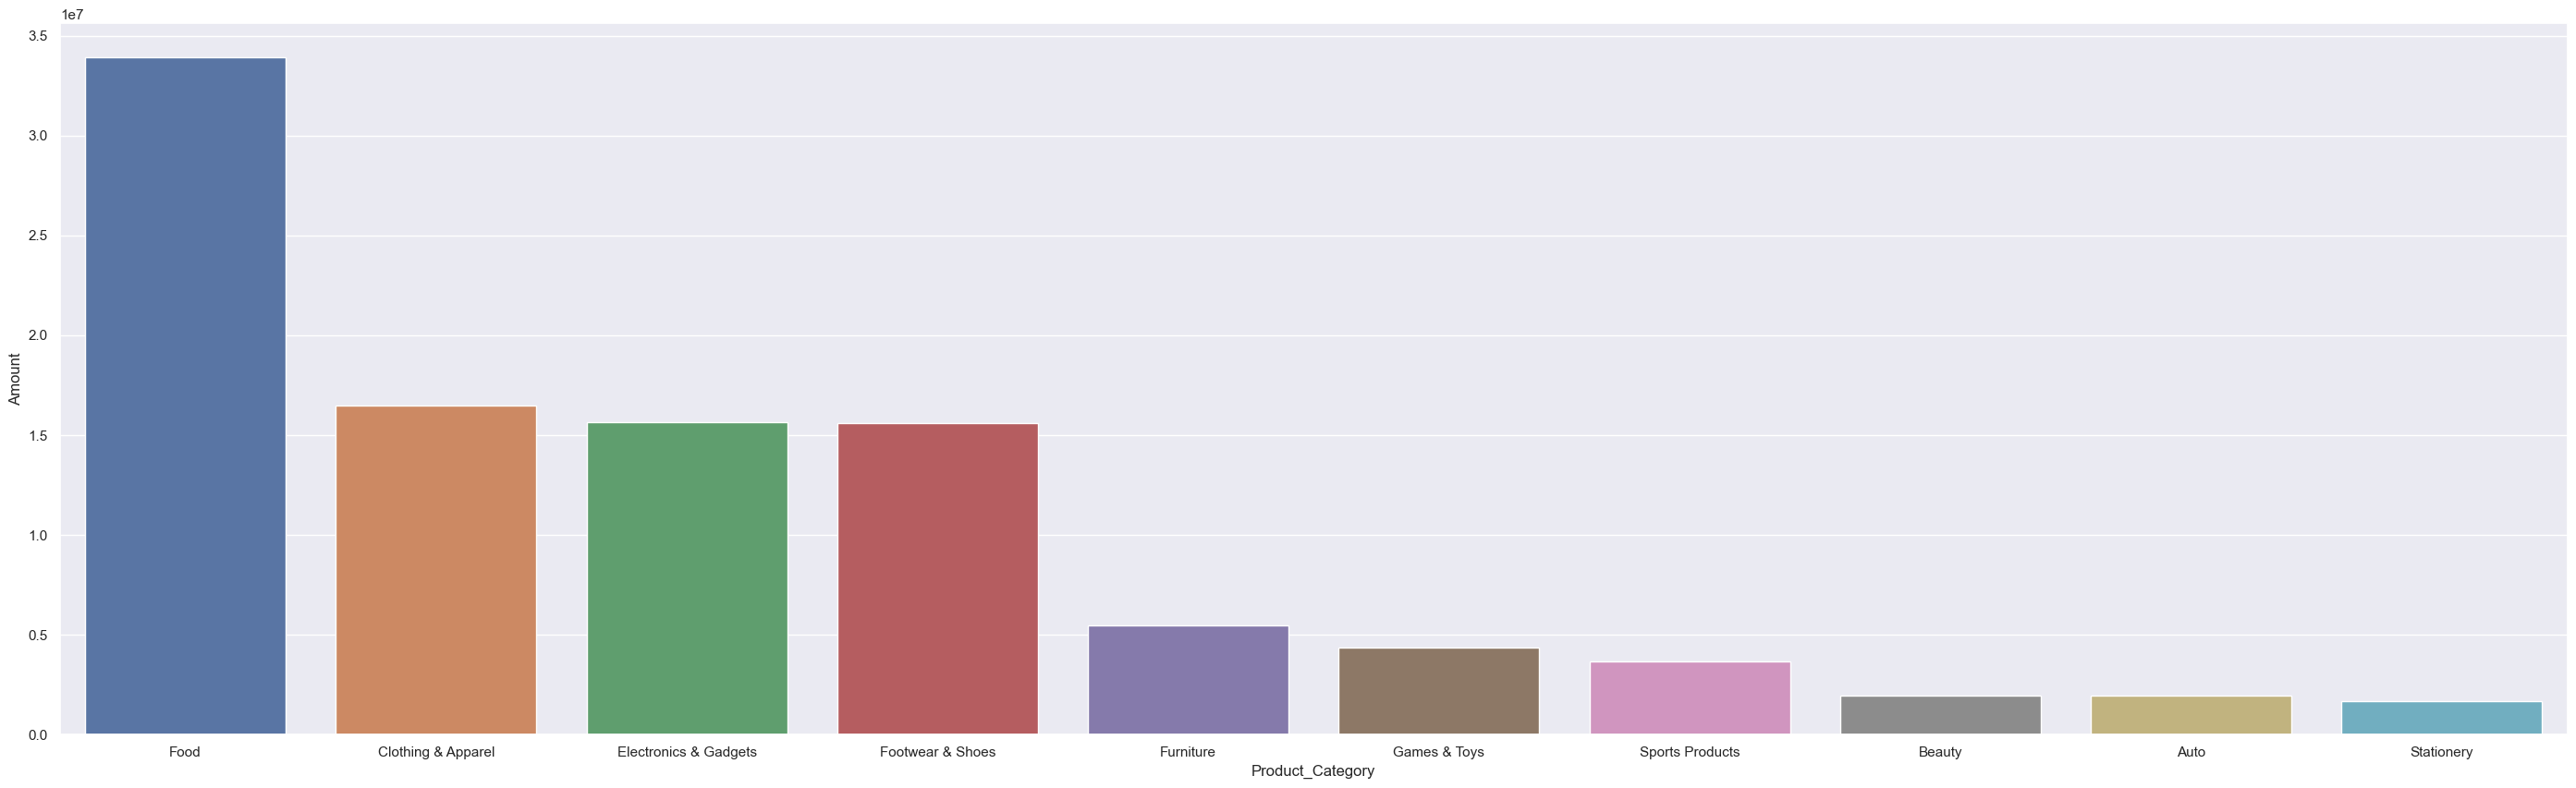

In [117]:
sns.barplot(x = "Product_Category", y = "Amount", data = sales_amount, hue = "Product_Category")

# CONCLUSION

### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.